<a href="https://colab.research.google.com/github/bettytom/major-projects/blob/main/depression_state_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
depress=pd.read_csv('/content/drive/My Drive/train_depressed.csv')
depress.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [ ]:
depress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surveyid                 1143 non-null   int64  
 1   village                  1143 non-null   int64  
 2   survey_date              1143 non-null   object 
 3   femaleres                1143 non-null   int64  
 4   age                      1143 non-null   float64
 5   married                  1143 non-null   int64  
 6   children                 1143 non-null   int64  
 7   hhsize                   1143 non-null   int64  
 8   edu                      1143 non-null   int64  
 9   hh_children              1143 non-null   int64  
 10  hh_totalmembers          809 non-null    float64
 11  cons_nondurable          1143 non-null   float64
 12  asset_livestock          1143 non-null   float64
 13  asset_durable            1143 non-null   float64
 14  asset_phone             

In [ ]:
depress.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1100.000000,1123.000000,1143.000000,724.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,727.000000,727.000000,809.000000,809.000000,809.000000,450.000000,265.000000,543.000000,809.000000,727.000000,720.000000,809.000000,720.000000,1143.0,1143.0,59.000000,680.000000,680.000000,680.000000,676.000000,572.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,128.407607,113.703653,148.571309,19.656758,10.254082,0.926868,0.000875,95.806020,8.323766,1.177717,0.634804,2.690428,1.829645,2.794807,3.647826,21.706431,0.186352,0.247594,0.107612,0.269466,0.032371,34.848492,17.321227,4.516265,1.866727,3.932084,21.414848,4.042870,0.910324,2.899587,0.440853,3.070457,0.274413,0.367120,5.626042,8.051863,3.722442,0.519817,0.496440,0.797353,1.955721,0.695412,1.0,1.0,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0.221347,24.356955,288.501084,34.463737,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,140.159957,239.698375,198.422016,28.053082,79.808523,1.663766,0.029579,114.487290,15.148661,6.740545,2.746150,12.141003,10.923501,8.331795,7.574917,28.397228,0.389561,0.431804,0.310025,0.443877,0.392355,257.963415,100.532226,8.626985,3.506706,12.199986,101.386778,6.246393,2.594545,5.274774,1.678111,2.205131,0.446494,0.482318,10.942463,17.940287,14.641253,0.321305,0.374030,0.330447,3.359077,0.375157,0.0,0.0,0.222380,117.267036,31.555958,0.341665,2.688571,0.837033,0.415336,798.985512,385.345212,134.058379,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.00000

### Data cleansing and transformation

In [ ]:
def age_to_categorical(data,age):
    age_group=pd.cut(age,bins=8,labels=['17-19','20-29','30-39','40-49','50-59','60-69','70-79','80-91'])
    #inserting the age group after age and deleting it
    data.insert(4,'age_groups',age_group)
    #dropping age column
    data.drop('age',axis=1,inplace=True)
    return data
depress=age_to_categorical(depress,depress.age)
depress

,surveyid,village,survey_date,femaleres,age_groups,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,20-29,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,17-19,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,17-19,1,3,5,9,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,20-29,1,2,4,10,2,4.0,378.832920,526.671080,196.98904,24.023054,49.647648,0.00,0,289.173520,36.434967,0.000000,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,50-59,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.000000,0.50,0,173.010990,0.870168,0.000000,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,927,152,27-Dec-61,1,30-39,0,4,5,9,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,4
1139,1039,104,13-Sep-61,1,17-19,1,0,2,10,0,2.0,93.073326,8.260629,295.48358,40.038425,0.000000,1.00,0,56.941502,1.601537,20.934376,4.186875,0.000000,NaN,0.000000,2.522421,8.48

In [ ]:
def sickdays_to_categorical(data1,sick):
    sick_days=pd.cut(sick,bins=3,labels=['0-11','12-21','22-31'])
    #inserting the age group after age and deleting it
    data1.insert(52,'sick_days',sick_days)
    #drop column
     #data.drop('age',axis=1,inplace=True)
    return data1
depress=sickdays_to_categorical(depress,depress.med_sickdays_hhave)


In [ ]:
def alcohol_to_categorical(data3,alcohol):
    alcohol_take=pd.cut(alcohol,bins=5,labels=['0-20','21-40','41-60','61-80','81-110'])
    #inserting the age group after age and deleting it
    data3.insert(19,'alcohol_take',alcohol_take)
    #dropping column
    
    return data3
depress=alcohol_to_categorical(depress,depress.cons_alcohol)

In [ ]:
def tobacco_to_categorical(data4,tobacco):
    tobacco_take=pd.cut(tobacco,bins=4,labels=['0-10','11-20','21-30','31-41'])
    #inserting the age group after age and deleting it
    data4.insert(20,'tobacco_take',tobacco_take)
    #dropping column
    
    return data4
depress=tobacco_to_categorical(depress,depress.cons_tobacco)

In [ ]:
depress.drop(['cons_tobacco','cons_alcohol','med_sickdays_hhave'],axis=1, inplace=True)
depress.shape

(1143, 75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


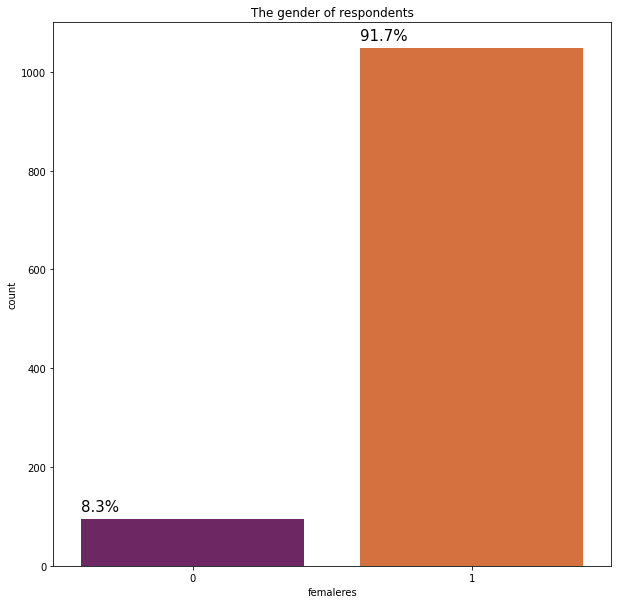

In [ ]:
gender=len(depress['femaleres'])
fig=plt.figure(figsize=(10,10))
plots=sns.countplot('femaleres',data=depress,palette="inferno")
for b in plots.patches:
  plots.annotate('{:.1f}%'.format(100*b.get_height()/gender), (b.get_x(), b.get_height()),size=15,xytext=(0,8),textcoords='offset points')
  plt.title("The gender of respondents");

Most respondents were female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


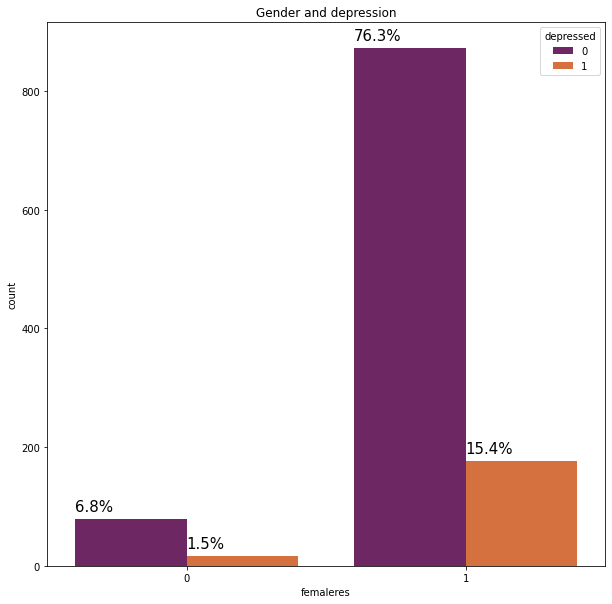

In [ ]:
gender=len(depress['femaleres'])
fig=plt.figure(figsize=(10,10))
plots=sns.countplot('femaleres',data=depress,hue='depressed',palette="inferno")
for b in plots.patches:
  plots.annotate('{:.1f}%'.format(100*b.get_height()/gender), (b.get_x(), b.get_height()),size=15,xytext=(0,8),textcoords='offset points')
  plt.title("Gender and depression");

15.4% of female respondents were reported to be depressed and 1.5% of the male population were reported to be depressed but this stills give way to many women in a position to be likely depressed.

In [ ]:
def count_columns(column):
  total=len(depress[column])
  fig=plt.figure(figsize=(15,10))
  plots=sns.countplot(x=column,data=depress,palette="inferno")
  for b in plots.patches:
    plots.annotate('{:.1f}%'.format(100*b.get_height()/total), (b.get_x(), b.get_height()),size=15,xytext=(0,8),textcoords='offset points')
  plt.show();

def count_target(column, target):
  total=len(depress[column])
  fig=plt.figure(figsize=(15,10))
  plots=sns.countplot(x=column,data=depress,hue=target,palette="magma"  )
  for b in plots.patches:
    plots.annotate('{:.1f}%'.format(100*b.get_height()/total), (b.get_x(), b.get_height()),size=15,xytext=(0,8),textcoords='offset points')
  plt.show();

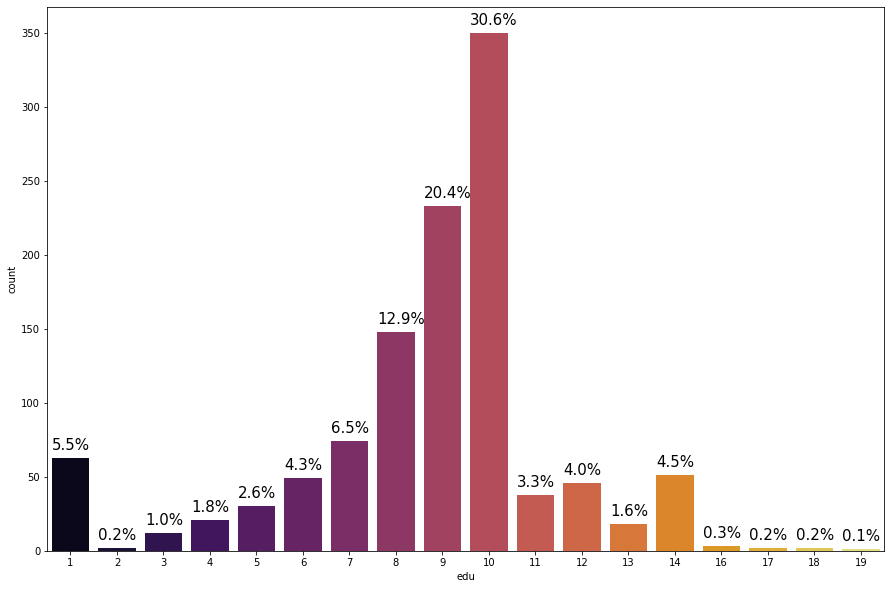

In [ ]:
count_columns('edu')

Most respondents had acquired 10 years of education and the range being 1-14 years of education, which is to suggest most respondents had finished their secondary education but few pursued tertiary education(university or college)

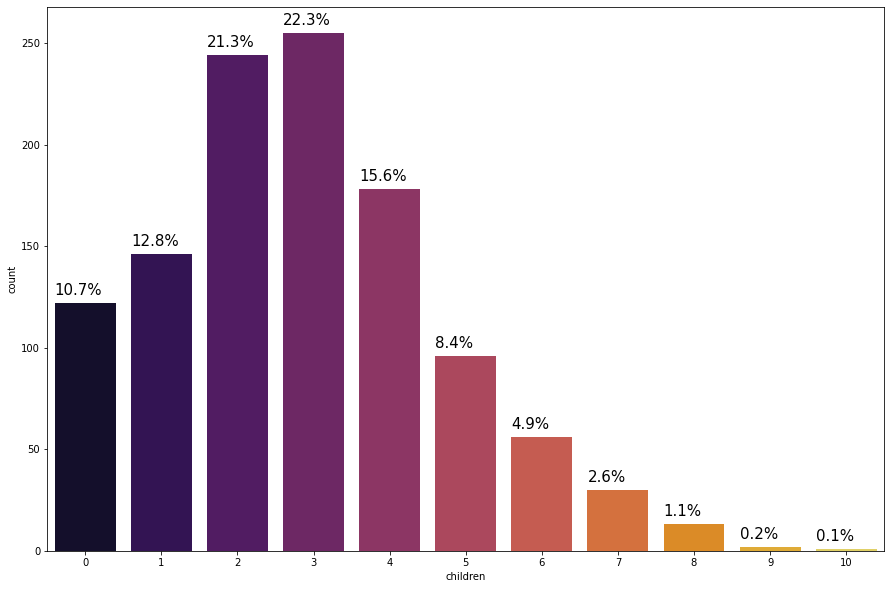

In [ ]:
count_columns('children')

Majority of respondents have 2-4 children and a good number who do not have children as well

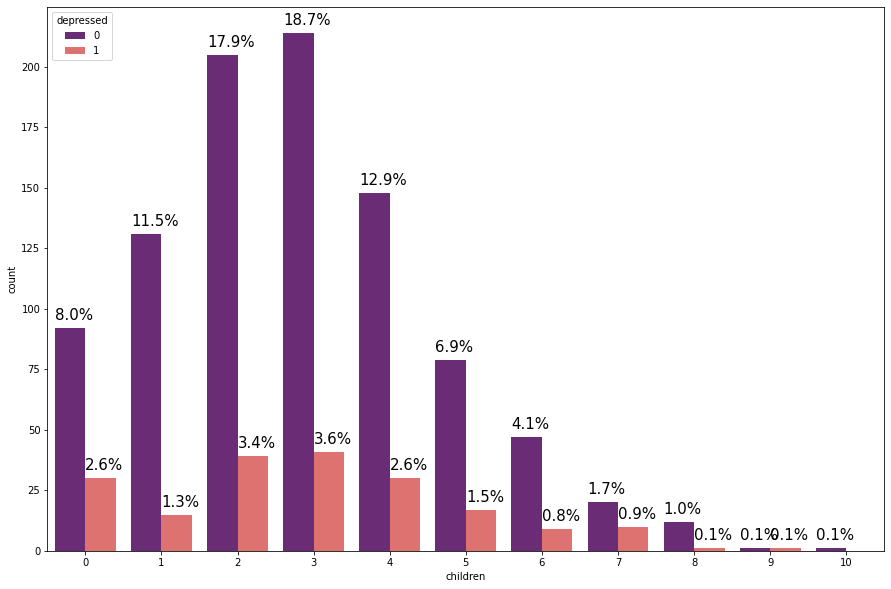

In [ ]:
count_target('children','depressed')

People who have 2-4 number of children have recorded high depression states more than people who have more than 4 children and this also includes people who are single with 2.6% chance of being depressed or are depressed.

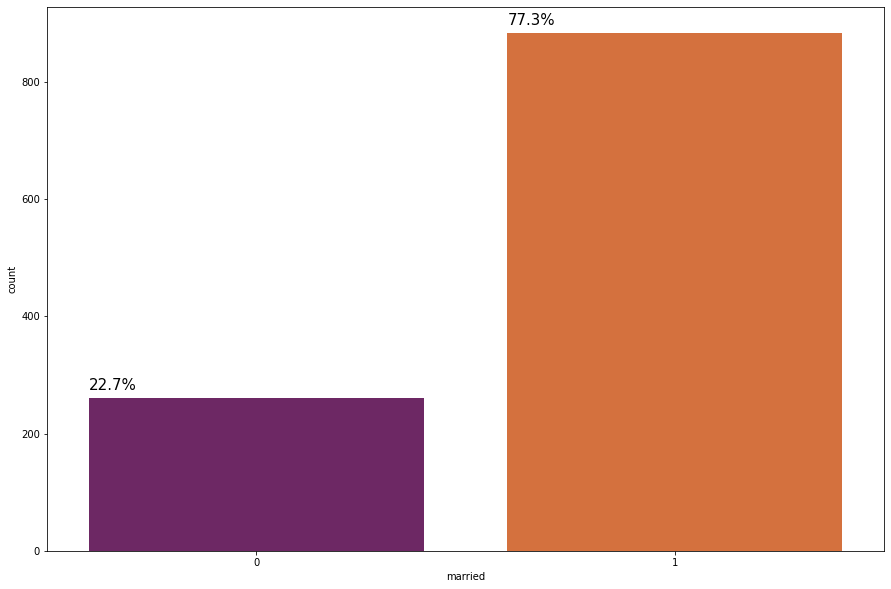

In [ ]:
count_columns('married')

Majority of the respondents are married

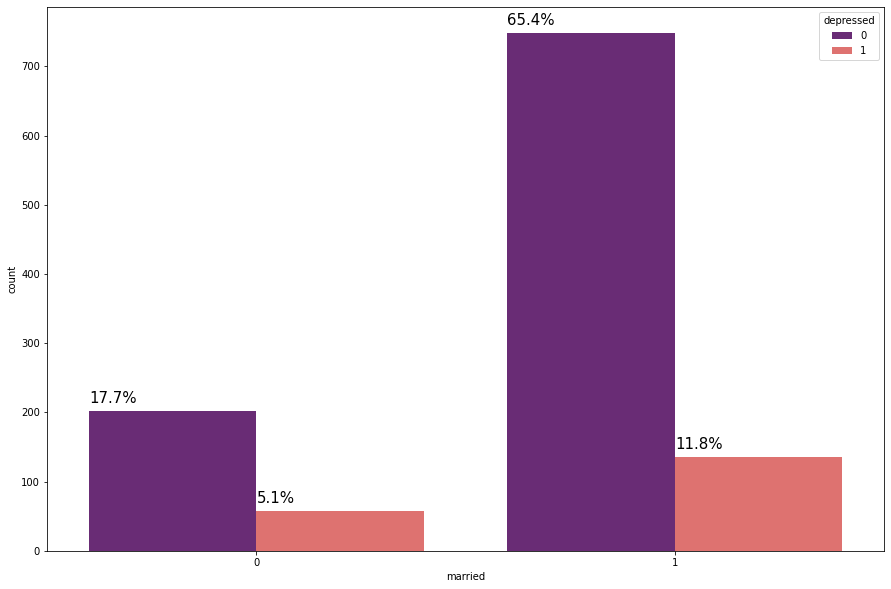

In [ ]:
count_target('married','depressed')

Those that are married have the highest record for being depressed.

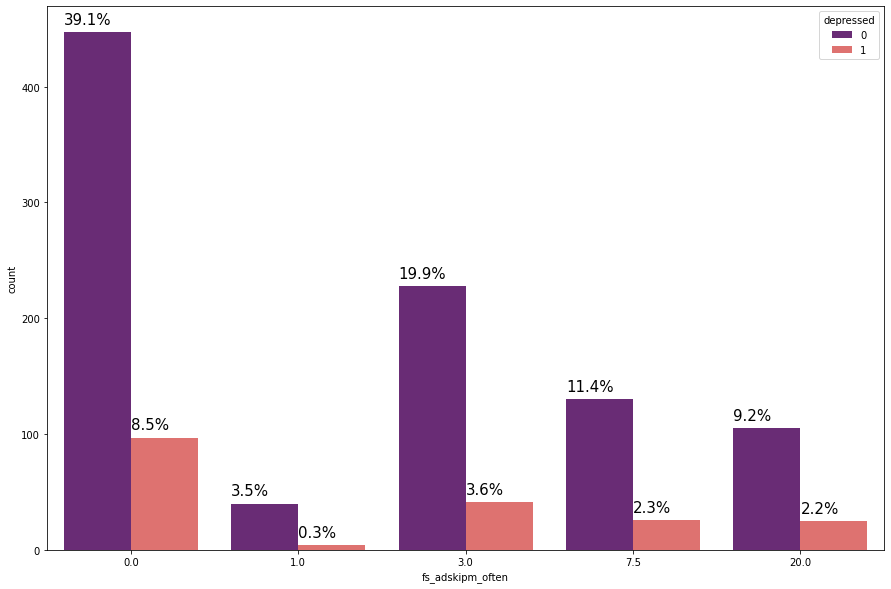

In [ ]:
count_target('fs_adskipm_often','depressed')

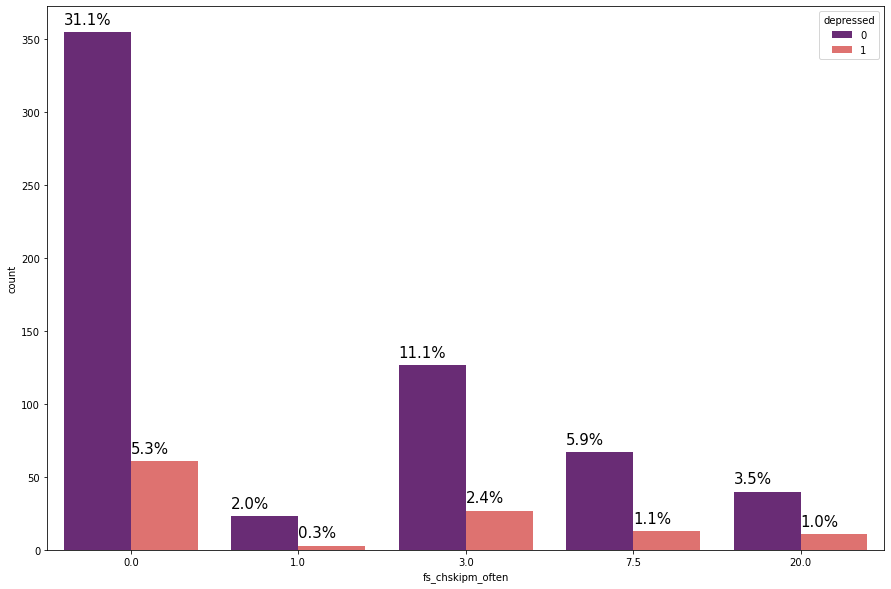

In [ ]:
count_target('fs_chskipm_often','depressed')

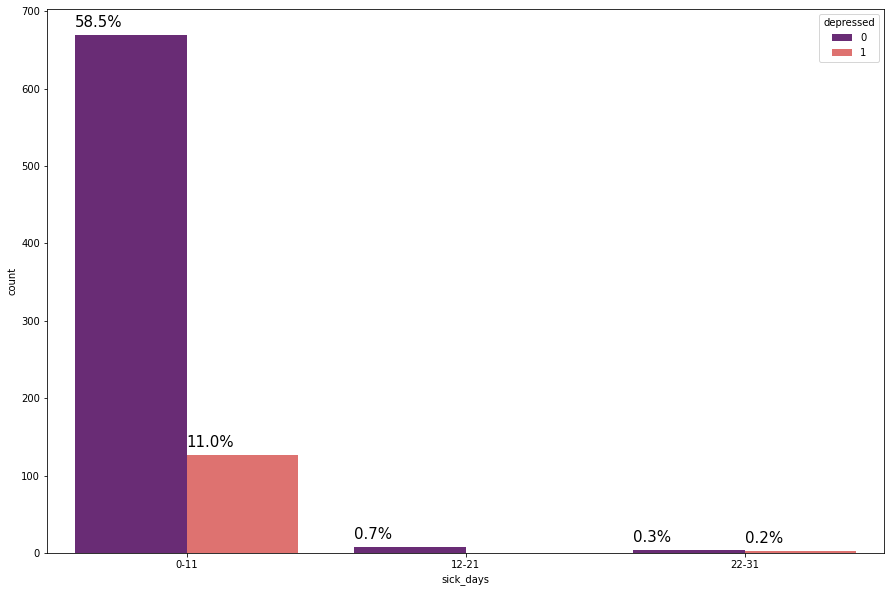

In [ ]:
count_target('sick_days','depressed')

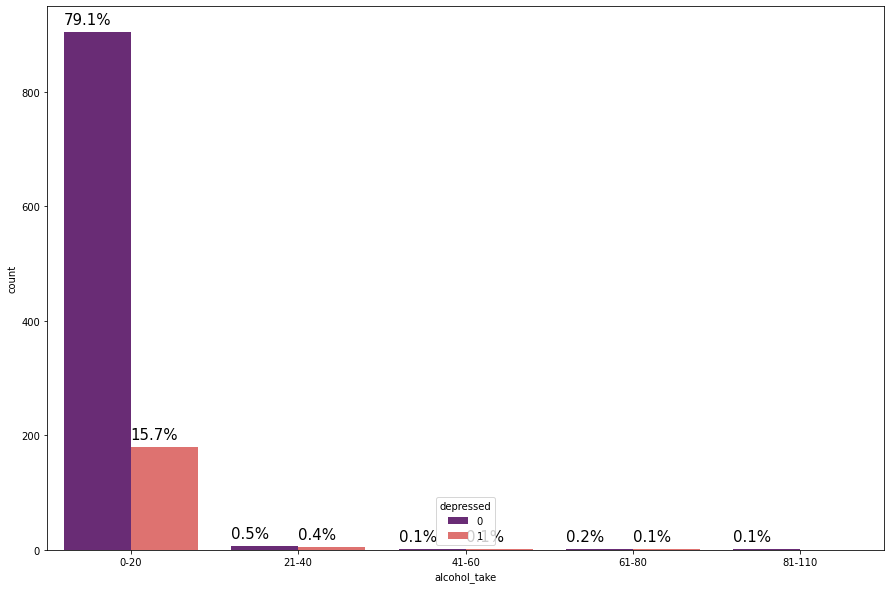

In [ ]:
count_target('alcohol_take','depressed')

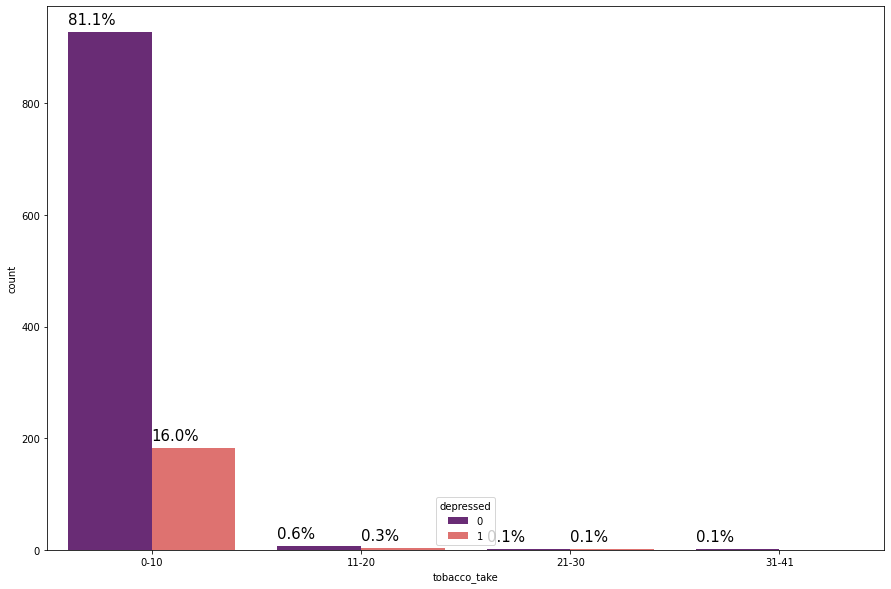

In [ ]:
count_target('tobacco_take','depressed')

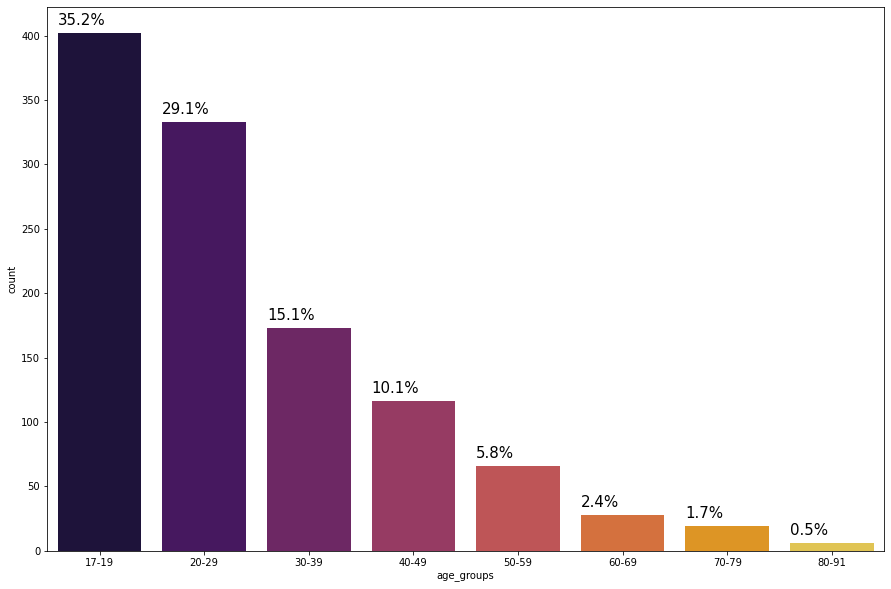

In [ ]:
count_columns('age_groups')

The respondents are mostly youth which is 79.6% of the population

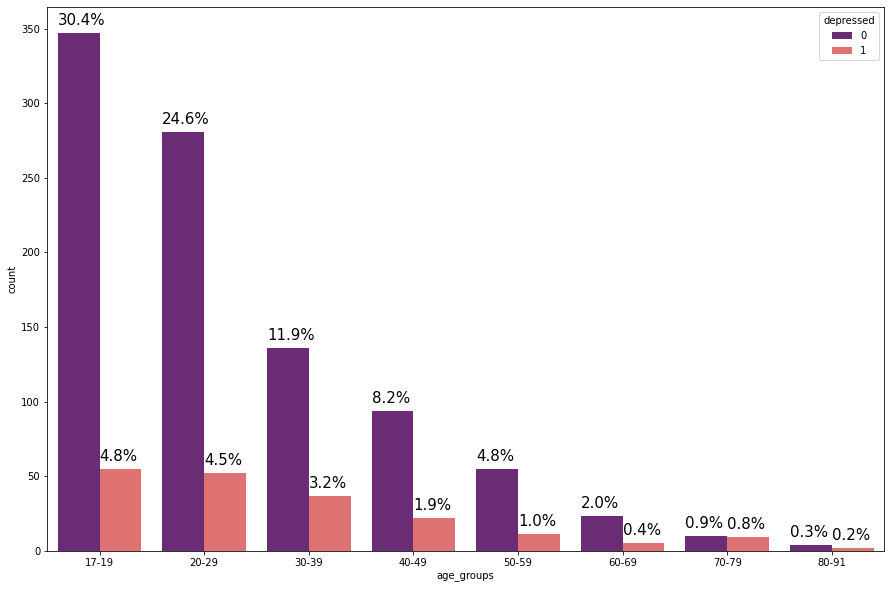

In [ ]:
fig=plt.figure(fi)
count_target('age_groups','depressed')

The majority age agroup which is 17-19 also has the highest rate of depression. Mainly the range 17-39 have the highest rate of depression amounting to 12.5% while the older age-groups are 4.3%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


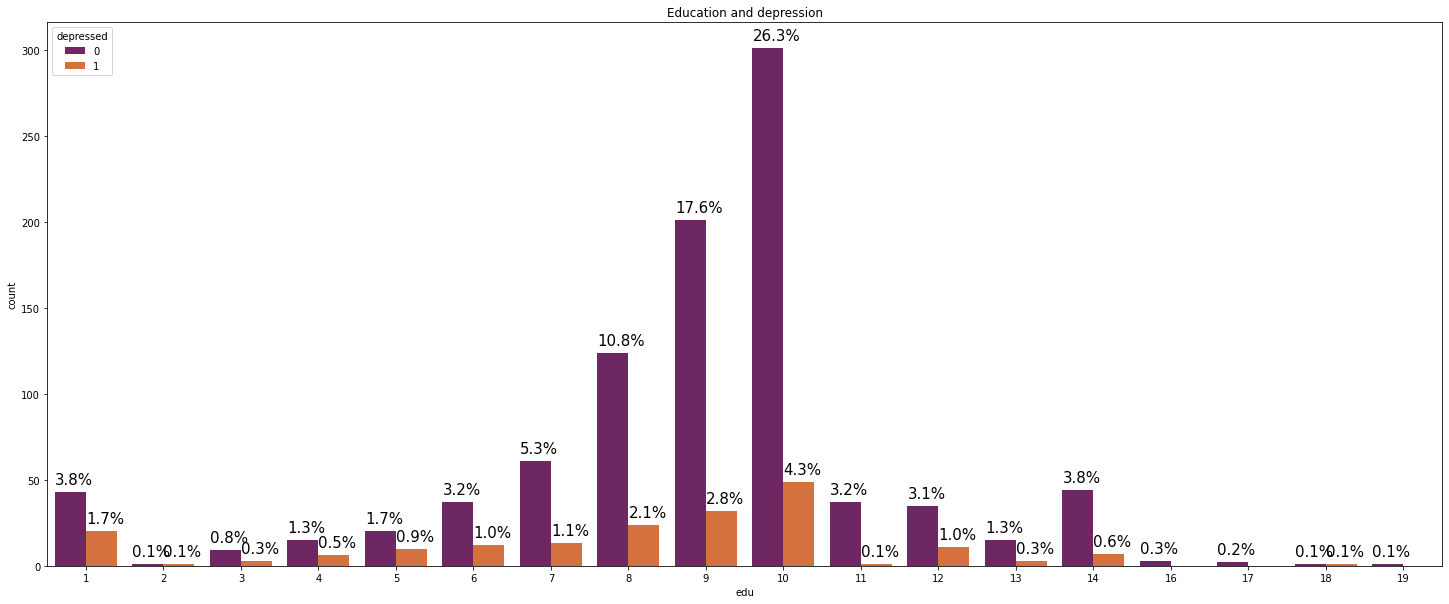

In [ ]:
education=len(depress['edu'])
fig=plt.figure(figsize=(25,10))
plots=sns.countplot('edu',data=depress,hue='depressed',palette="inferno")
for e in plots.patches:
  plots.annotate('{:.1f}%'.format(100*e.get_height()/education), (e.get_x(), e.get_height()),size=15,xytext=(0,8),textcoords='offset points')
  plt.title("Education and depression");

The  former education system in Kenya was 16 years max..8.4.4. the number people who have recieved full education are few accounting for 0.8% and these people also have no signs or indications of depression rates. However looking at the left side, it is different the rate of people depressed is 16.8% and this could mean that not having a complete / decent education would make it hard for people to get decent jobs that can support them that means the income status is low and chances of being depressed is high with no proper means of an income.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pickle

In [ ]:
# new train and test set with features selected for the model
new_train=pd.read_csv('/content/drive/My Drive/new_train.csv')
new_test=pd.read_csv('/content/drive/My Drive/new_test.csv')

In [ ]:
new_train.head()

,femaleres,edu,med_expenses_hh_ep,cons_alcohol,ed_expenses_perkid,fs_adwholed_often,fs_chwholed_often,med_sickdays_hhave,cons_tobacco,depressed
0,1,10,1.601537,0.0,10.089684,0.0,0.0,0.000000,0.0,0
1,1,8,1.601537,0.0,10.089684,0.0,0.0,0.000000,0.0,1
2,1,9,1.601537,0.0,10.089684,0.0,0.0,0.000000,0.0,0
3,1,10,1.601537,0.0,10.089684,0.0,0.0,0.000000,0.0,0
4,0,10,1.601537,0.0,6.806532,0.0,0.0,1.166667,0.0,0


In [ ]:
#drop values
new_train.drop('femaleres',axis=1, inplace=True)
new_test.drop('femaleres',axis=1, inplace=True)

In [ ]:
#using it on split data
X=new_train[['edu','med_expenses_hh_ep','cons_alcohol','ed_expenses_perkid','fs_adwholed_often','fs_chwholed_often','cons_tobacco','med_sickdays_hhave']]
Y=new_train['depressed']


In [ ]:
#split data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.5)


In [ ]:
decision=DecisionTreeClassifier(min_samples_split=10,max_depth=15,random_state=1024)
decision.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=1024)

In [ ]:
predict=decision.predict(test_x)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
#r2_score(predict,test_y)
print('{:.5}%'.format(100*r2_score(test_y,predict)))

-65.495%


In [ ]:
mean_absolute_error(test_y,predict)

0.22727272727272727

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(test_y,predict)))
print(pd.DataFrame(confusion_matrix(test_y,predict)))

sns.set_style('white') 
class_names = ['0','1']

Accuracy Score is 0.77273
     0   1
0  424  54
1   76  18


[Text(315.2450892857143, 526.6125000000001, 'X[7] <= 2.45\ngini = 0.287\nsamples = 571\nvalue = [472, 99]'),
 Text(188.07589285714286, 492.63750000000005, 'X[4] <= 13.75\ngini = 0.251\nsamples = 435\nvalue = [371, 64]'),
 Text(180.1044642857143, 458.6625, 'X[7] <= 0.414\ngini = 0.243\nsamples = 430\nvalue = [369, 61]'),
 Text(135.5142857142857, 424.6875, 'X[3] <= 93.71\ngini = 0.18\nsamples = 180\nvalue = [162, 18]'),
 Text(127.54285714285714, 390.7125, 'X[1] <= 45.263\ngini = 0.166\nsamples = 175\nvalue = [159, 16]'),
 Text(119.57142857142857, 356.7375, 'X[3] <= 11.338\ngini = 0.152\nsamples = 169\nvalue = [155, 14]'),
 Text(99.64285714285714, 322.76250000000005, 'X[3] <= 9.849\ngini = 0.198\nsamples = 117\nvalue = [104, 13]'),
 Text(83.7, 288.7875, 'X[2] <= 12.561\ngini = 0.14\nsamples = 106\nvalue = [98, 8]'),
 Text(75.72857142857143, 254.8125, 'X[1] <= 7.176\ngini = 0.126\nsamples = 104\nvalue = [97, 7]'),
 Text(47.82857142857143, 220.83750000000003, 'X[1] <= 0.614\ngini = 0.087\ns

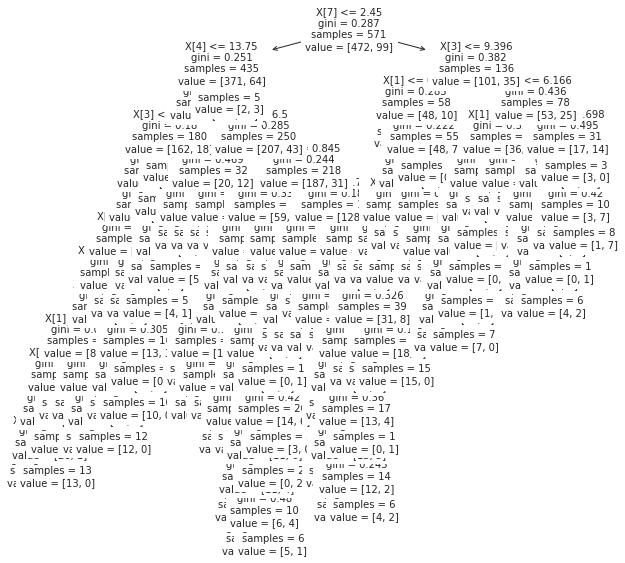

In [ ]:
#visualize tree
from sklearn import tree
fig=plt.figure(figsize=(10,10))
tree.plot_tree(decision,fontsize=10)

In [ ]:
#another way
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [ ]:
dot_data=export_graphviz(decision,filled=True,rounded=True,class_names=['0','1'],feature_names=X.columns,out_file=None)
graph=graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

True

In [ ]:
#full data
decision.fit((new_train.drop('depressed',axis=1)),new_train['depressed'])

DecisionTreeClassifier()

In [ ]:
decision_predict=decision.predict(new_test)

In [ ]:
pickle.dump(decision_predict,open('decmodel.pkl','wb'))

In [ ]:
model=pickle.load(open('decmodel.pkl','rb'))